In [1]:
# import craft functions
from craft_text_detector import (
    read_image,
    load_craftnet_model,
    load_refinenet_model,
    get_prediction,
    export_detected_regions,
    export_extra_results,
    empty_cuda_cache
)

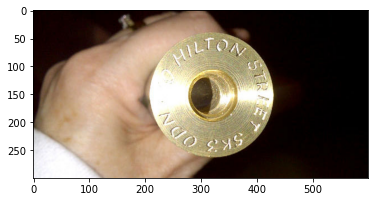

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
# set image path and export folder directory
image_path = './Web Images/C-1.jpg'
output_dir = './Web Images/Craft Output 2/'
image = mpimg.imread(image_path)
plt.imshow(image)

In [3]:
# load models
refine_net = load_refinenet_model(cuda=False)
craft_net = load_craftnet_model(cuda=False)

In [5]:
image = read_image(image_path)
# perform prediction
# set cuda=False
prediction_result = get_prediction(
    image=image,
    craft_net=craft_net,
    refine_net=refine_net,
    text_threshold=0.7,
    link_threshold=0.4,
    low_text=0.4,
    cuda=False,
    long_size=1280
)

In [6]:
# export detected text regions
exported_file_paths = export_detected_regions(
    image_path=image_path,
    image=image,
    regions=prediction_result["boxes"],
    output_dir=output_dir,
    rectify=True
)

In [7]:
print(exported_file_paths)

['./Web Images/Craft Output 2/C-1_crops/crop_0.png', './Web Images/Craft Output 2/C-1_crops/crop_1.png']


In [8]:
# export heatmap, detection points, box visualization
export_extra_results(
    image_path=image_path,
    image=image,
    regions=prediction_result["boxes"],
    heatmaps=prediction_result["heatmaps"],
    output_dir=output_dir
)